<a href="https://colab.research.google.com/github/Askoye/IP-Core/blob/master/Python_Notebook_Solution_Moringa_Data_Science_Core_W2_Ted_Askoye_Independent_Project_2020_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Financial Inclusion Report**

### **SECTION 1:** Defining the data analytical question





###a) Specifying the Data Analytic Question

Finding out the state of Financial inclusion in Kenya, Rwanda, Tanzania and Uganda between 2016-2018



### b) Defining the Metric for Success

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.





### c.) Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d.) Recording the Experimental Design

  > Here is the breakdown of the process:
   1. Started with loading data, and previewing the top and bottom rows
   2. Explored the data a bit to understand the kind of dataset we have
   3. Validated the data from outside source
   4. Cleaned the data
   5. Perfomed Univariate Analysis
   6. Perfomed Bivariate Analysis
   7. Performed Multivariate Analysis
   9. Challenged the Solution



### e.) Data Relevance

Yes the data was relevant to the research question asked as it evaluates the data set to identify whether the information within is useful to solve the identfied problem

The data source was from Finscope surveys ranging from 2016 to 2018, from Kenya, Rwanda, Tanzania and uganda which are our countries of focus. The surveys were conducted recently, hence the data is current and has individual demograpgics that will support us in assessing factors that drive financial inclusion.

### f.) Data validation
Checking data against external sources to see if they match.

This dataset was validated with an external source that is reliable. 


## **SECTION 2:** Reading and checking the dataset

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Dataset files :

Variable Definitions: http://bit.ly/VariableDefinitions 

Dataset: http://bit.ly/FinancialDataset  

In [161]:
dataset_df = pd.read_csv('http://bit.ly/FinancialDataset')
var_def_df = pd.read_csv('http://bit.ly/VariableDefinitions')


Determining the number of records

In [162]:
dataset_df.shape #Determining the number of records in the dataset
print('This dataset has ' + str(dataset_df.shape[0]) + ' rows, and ' + str(dataset_df.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [163]:
var_def_df.shape #Determining the number of records in the dataset description
print('This dataset description has ' + str(var_def_df.shape[0]) + ' rows, and ' + str(var_def_df.shape[1]) + ' columns')

This dataset description has 12 rows, and 2 columns


Previewing our data

In [164]:
dataset_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


##3. Checking the Data

In [165]:
dataset_df.tail() #Previewing the bottom of our dataset

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [166]:
dataset_df.describe() # Checking the statistical description of our dataset


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


We found that the mean of the household sizes was 3.68 and our respondent age was 38.8 indicating that the respondents were neither too young nor old

In [167]:
dataset_df.columns #checking the column data that is in our dataset

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [168]:
dataset_df.dtypes #Checking each column's datatypes and finding out wheteher they are appropriate
 

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

Our dataset has objects ,integers and float datatypes

In [169]:
dataset_df.nunique() #checking for unique values in our dataset

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

## 5. Tidying the Dataset

In [170]:
dataset_df.isnull().sum() #checking for null values


country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

Most of our records have null values but are negligible compared to the total records of the dataset (23,524 records)

In [171]:
dataset_df.dropna (inplace =True) #Dealing with missing values by dropping them

In [172]:
dataset_df.isnull().sum() #Checking if missing values have been dropped and find out that they have.

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [173]:
# Aligning the columns in our dataset by ensuring uniformity

dataset_df.columns = dataset_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
dataset_df.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'location','cell_phone_access' : 'phone','the_relathip_with_head' : 'relationship_with_head', 'level_of_educuation' : 'education_level'}, axis=1, inplace=True)
dataset_df.head()

,country,year,uniqueid,bank_account,location,phone,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


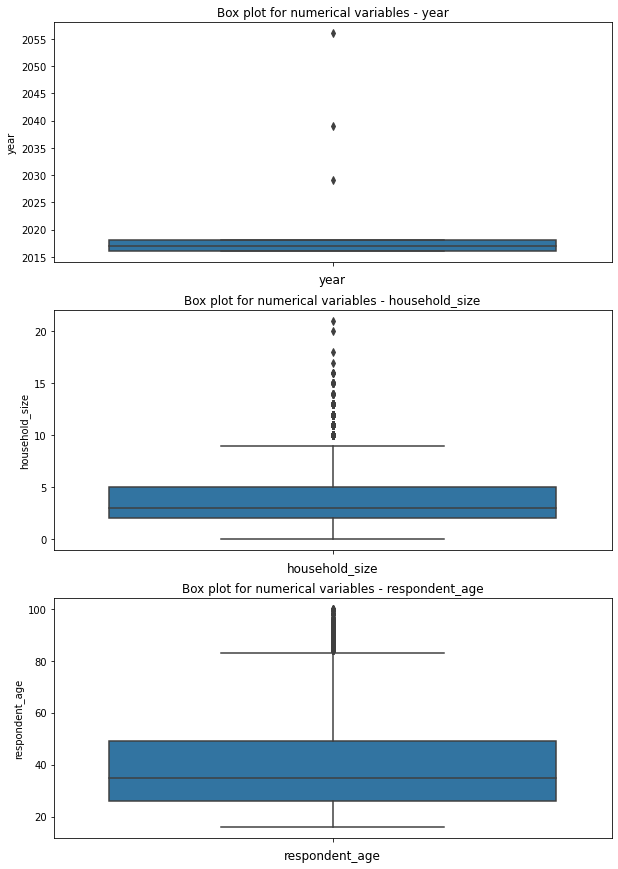

In [174]:
# checking and dealing with outliers 

col_names= ['year','household_size', 'respondent_age',]

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=dataset_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

The box plot indicates that the data seems to be skewed to the right with the above variables (year,household size and the respondent age) having outliers. 

These were 2029, 2056 and 2039 which were incorrect. For household size, we had those outside the range from 10 and above 20 and for respondent age we had outliers of respondent aged above 85

In [175]:
# Dealing with Outliers by removing them
Q1 = dataset_df.quantile(0.25)
Q3 = dataset_df.quantile(0.75)
IQR = Q3 - Q1
dataset_df_out = dataset_df[~((dataset_df < (Q1 - 1.5 * IQR)) | (dataset_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset_df)
print(dataset_df_out)

      country  year  ...                  education_level                type_of_job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

## 6. Exploratory Analysis
a)Univariate analysis

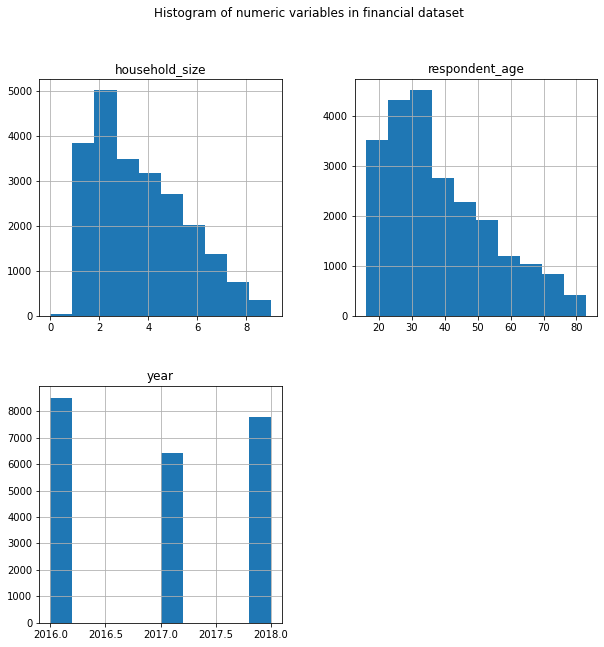

In [176]:

# Plotting our numerical variables on histogram to assess the relationship
dataset_df_out.drop(['country','uniqueid', 'bank_account','location' , 'phone',	'gender_of_respondent','relationship_with_head','marital_status',	'education_level',	'type_of_job'] ,axis=1).hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables in financial dataset")
plt.savefig('Financial access Histogram')
plt.show()


Based on the histograms above we can see the kinds of distributions that seem to follow a positive skew.

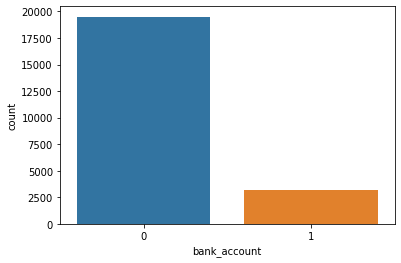

In [157]:
# Plotting the count of those with a bank account
sns.countplot(dataset_df_out['bank_account'])


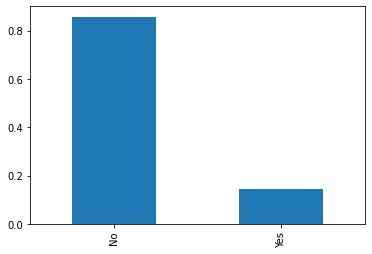

In [100]:
# Plotting respondents with bank accounts by percentage
(dataset_df_out['bank_account'].value_counts()/len(dataset_df_out)).plot.bar()

# Those without bank accounts were more than 80&

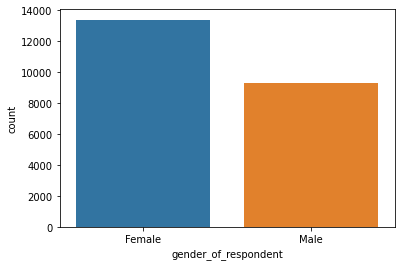

In [101]:
# Plotting the count of gender of respondents

sns.countplot(dataset_df_out['gender_of_respondent'])
# We had more female respondents that male

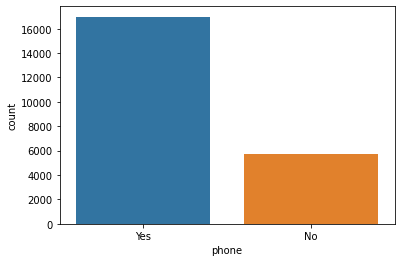

In [102]:
# Plotting the count of respondents that had access to a cell phone

sns.countplot(dataset_df_out['phone'])
# Most respondents did not have access to a cell phone

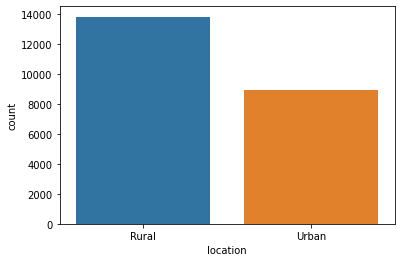

In [103]:
# Plotting the count of respondents based on location

sns.countplot(dataset_df_out['location'])

# Most respondents were from rural area

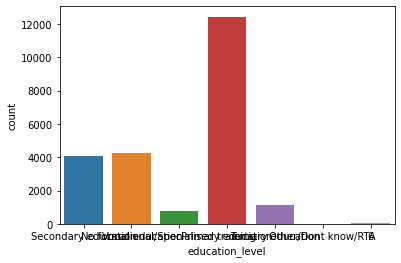

In [105]:
# Plotting the count of respondents based on education level
sns.countplot(dataset_df_out['education_level'])

#  Most repondents had a primary level education

b.) Bivariate Analysis

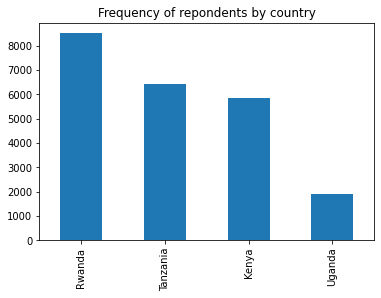

In [106]:
dataset_df_out['country'].value_counts().plot.bar(title='Frequency of repondents by country')


We saw a bulk of respondents from Rwanda, followed by Tanzania,kenya and Uganda

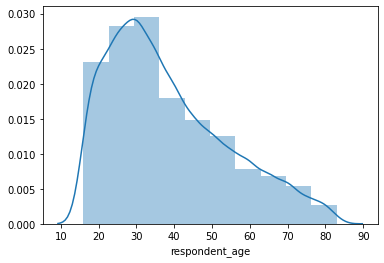

In [107]:
# Ditribution plot for respondent age
sns.distplot(dataset_df_out['respondent_age'], bins=10)


It shows that a huge population of respondents was aged between 20-40 years

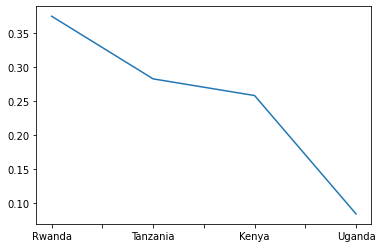

In [108]:
(dataset_df_out['country'].value_counts().head(10)/len(dataset_df_out)).plot.line()

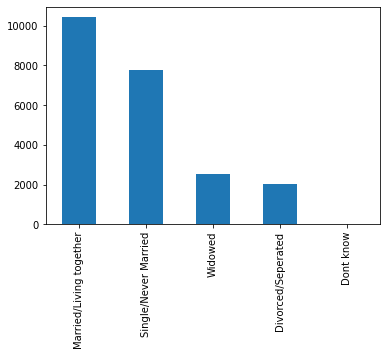

In [109]:
# Plotting repondents by marital status
dataset_df_out['marital_status'].value_counts().plot.bar()


It shows that highest number of residents were married 

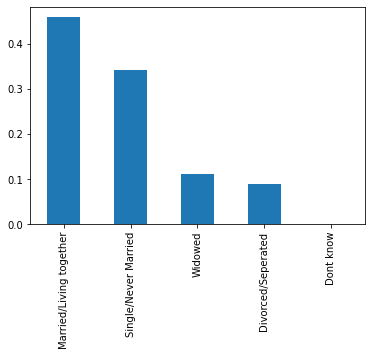

In [110]:
# Plotting percentage of respondents by marital status

(dataset_df_out['marital_status'].value_counts()/len(dataset_df_out)).plot.bar()


A bulk of our respondents who are married were more than 40%

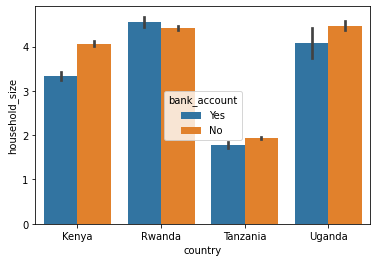

In [111]:
#Creating subplots for our dataset.

sns.barplot(x='country', y='household_size', hue ='bank_account', data = dataset_df_out)

Tanzania has households with smaller size, followed by Kenya where Uganda and Rwanda seem to be at the same level.


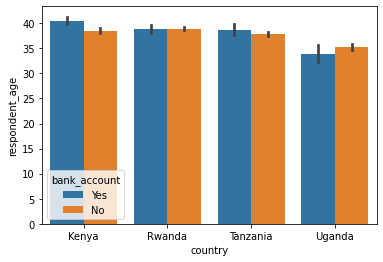

In [112]:
#Plotting subplots for our dataset

sns.barplot(x='country', y='respondent_age', hue ='bank_account', data = dataset_df_out)


There is an equal numbers of those with and without bank accounts under the age of 40 accross the highlighted countries

In [113]:
#Creating frequency tables to observe the Variable distribution

dataset_df_out['bank_account'].value_counts()


No     19490
Yes     3235
Name: bank_account, dtype: int64

There are 3297 people with bank account and 20046 without them

In [114]:
#Calculating range between minimum and maximum age of respondents
dataset_df_out_max = dataset_df_out["respondent_age"].max()
dataset_df_out_min = dataset_df_out["respondent_age"].min()

# Calculating the range
dataset_df_out_max - dataset_df_out_min


67.0

In [115]:
# Finding the quantiles of age of respondents variable
# 
dataset_df_out["respondent_age"].quantile([0.25, 0.5, 0.75])


0.25    26.0
0.50    35.0
0.75    48.0
Name: respondent_age, dtype: float64

In [116]:
#Checking skewness
dataset_df_out["respondent_age"].skew() 



0.7402138281724044

The respondent age is posively skewed

In [177]:
#checking Kurtosis
dataset_df_out["respondent_age"].kurt() 


-0.23749387799691757

The -0.23 indicates a Platykurtic distribution 

In [178]:
#Checking summary statistics for respondent's age
dataset_df_out["respondent_age"].describe()

count    22725.000000
mean        38.347987
std         15.806141
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: respondent_age, dtype: float64

b)Bivariate analysis

In [119]:
# Checking how our varibales are corelated using a matrix
corrMatrix = dataset_df_out.corr()
corrMatrix
 

,year,household_size,respondent_age
year,1.000000,-0.096684,-0.023538
household_size,-0.096684,1.000000,-0.106209
respondent_age,-0.023538,-0.106209,1.000000



From the matrix we observe that correlation amongst our variables is not very strong

The highest correation is a negative correlation of -0.119709 between household size and the age of repondent.

c.) 

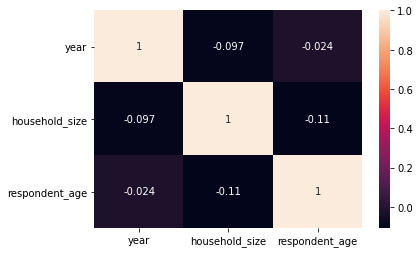

In [179]:
corelation = dataset_df_out.corr()
# using a heatmap to display the results
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True) 

From the heat map below, we observe that correlation amongst our variables is not very strong, the highest being negative correlation of -0.119709 between household size and the age of respondent.

This therefore means that there are key variables/determinants that can influence whether an individual will open or use a bank account or not. From our dataset we will consider the following when implementing the solution:
1. Location; individuals in the urban areas are likey to open accounts more than those in the rural areas as they have access to banking halls, transport etc. 
2. Level of education: Individuals with higher literacy levels are likely to open and use bank accounts as they have a better understanding
3. Type of job: Those formally employed are likely to open and use bank accounts compared to those in the informal sector and farming in rural areas
4. Gender of respondent; we are likely to have more male open and use bank accounts as they have access to resources

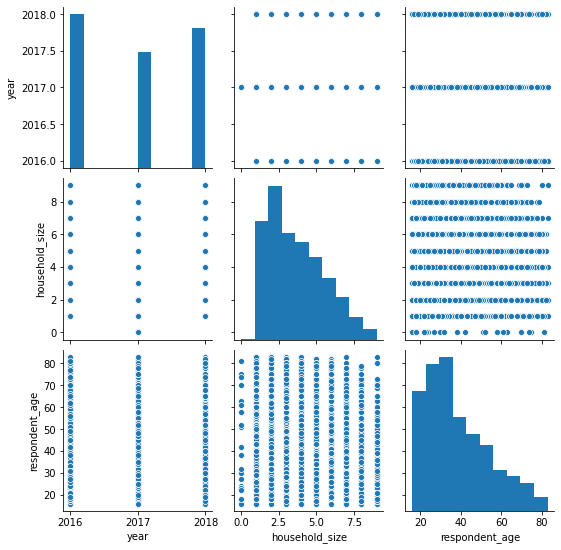

In [121]:
# Plotting the bivariate summaries and recording our observations
sns.pairplot(dataset_df_out)
plt.show()

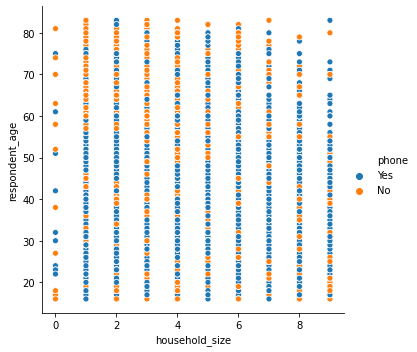

In [180]:
sns.relplot( x = 'household_size', y = 'respondent_age', hue = 'phone',data= dataset_df_out)

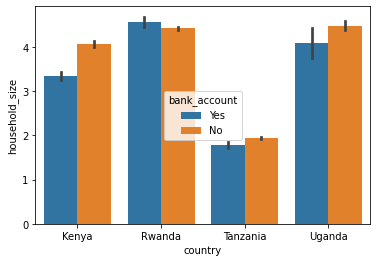

In [123]:
# Plotting staked plots
sns.barplot(x= 'country', y = 'household_size', data = dataset_df_out, hue='bank_account')


We see Tanzania had smaller household sizes, followed by Kenya, Uganda and rwanda seems to be at same level

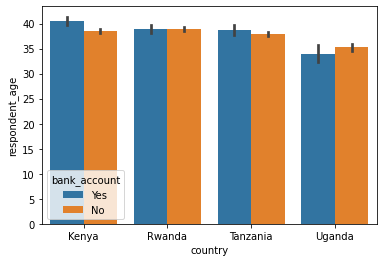

In [124]:
# Plotting staked plots
sns.barplot(x= 'country', y = 'respondent_age', data = dataset_df_out, hue='bank_account')
# This shows that there is 50/50 distribution of repondents with or without bank accounts below age 40 in the 4 countries

This shows that there is a 50/50 distribution of repondents with or without bank accounts below age 40 

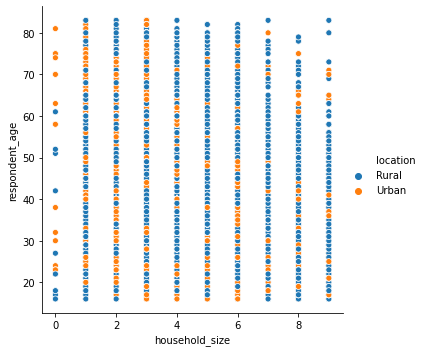

In [125]:
# Plotting relational plots
sns.relplot( x = 'household_size', y = 'respondent_age', hue = 'location',data= dataset_df_out)

We see that Most respondents are from rural area 

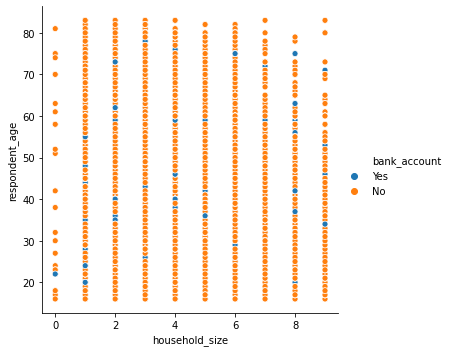

In [126]:
# Plotting relational plots
sns.relplot( x = 'household_size', y = 'respondent_age', hue = 'bank_account',data= dataset_df_out)


Most respondents had no bank accounts

#SECTION 6: Multivariate Analysis

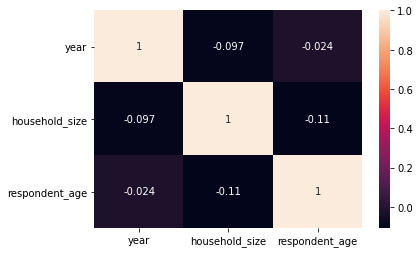

In [181]:
# Calculating the correlation between the variables

correlation = dataset_df_out.corr()

sns.heatmap(correlation,xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)


From the heat map below, we observe that correlation amongst our variables is not very strong, the highest being negative correlation of -0.119709 between household size and the age of respondent.



This therefore means that there are key variables/determinants that can influence whether an individual will open or use a bank account or not. From our dataset we will consider the following when implementing the solution:

Location; 
- Individuals in the urban areas are likey to open accounts more than those in the rural areas as they have access to banking halls, transport etc.

Level of education: 
- Individuals with higher literacy levels are likely to open and use bank accounts as they have a better understanding

Type of job: 
- Those formally employed are likely to open and use bank accounts compared to those in the informal sector and farming in rural areas

Gender of respondent: 
- We are likely to have more male open and use bank accounts as they have access to resources

This indicates that Tanzania had smaller household sizes, followed by Kenya, Uganda and rwanda seems to be at same level

Most of the repondents in Kenya did not have bank accounts to the other 3 countries, this could be attributed to the fact that mobile money penetration in Kenya is well adopted, hence individuals may not find the need to open bank accounts

## 7. Implementing the Solution


For us to effectively implement our solution, we need to determine which factors have significant influence on whether an individual will open or use a bank account or not

In [134]:
#Preparing our dataset for implementation, we will change datatypes in form of string to numeric for ease of comparison

dataset_df_out["gender_of_respondent"] = np.where(dataset_df_out["gender_of_respondent"].str.contains("Male", "Female"), 1, 0)
dataset_df_out.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,year,uniqueid,bank_account,location,phone,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [135]:
dataset_df_out["bank_account"] = np.where(dataset_df_out["bank_account"].str.contains("Yes", "No"), 1, 0)
dataset_df_out.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,uniqueid,bank_account,location,phone,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,type_of_job
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [136]:
dataset_df_out["location"] = np.where(dataset_df_out["location"].str.contains("Rural", "Urban"), 1, 0)
dataset_df_out.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,uniqueid,bank_account,location,phone,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,type_of_job
0,Kenya,2018,uniqueid_1,1,1,Yes,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,1,No,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,1,Yes,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,No,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [137]:
dataset_df_out["phone"] = np.where(dataset_df_out["phone"].str.contains("Yes", "No"), 1, 0)
dataset_df_out.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,uniqueid,bank_account,location,phone,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,education_level,type_of_job
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [138]:
#calculating corelation
corrMatrix = dataset_df_out.corr()
corrMatrix 



,year,bank_account,location,phone,household_size,respondent_age,gender_of_respondent
year,1.000000,0.116054,-0.224967,-0.063496,-0.096684,-0.023538,0.000610
bank_account,0.116054,1.000000,-0.090511,0.209884,-0.023717,0.025627,0.116261
location,-0.224967,-0.090511,1.000000,0.089441,0.286264,0.048754,-0.013490
phone,-0.063496,0.209884,0.089441,1.000000,0.110031,-0.081444,0.103376
household_size,-0.096684,-0.023717,0.286264,0.110031,1.000000,-0.106209,0.008479
respondent_age,-0.023538,0.025627,0.048754,-0.081444,-0.106209,1.000000,0.014766
gender_of_respondent,0.000610,0.116261,-0.013490,0.103376,0.008479,0.014766,1.000000


This indicates that correlation between some variables has improved though not very high where the Highest being 0.27 between household size and location

In [139]:
# Dropping unnecessary columns that are in string format
# 
dataset_df_out.drop(['country','year','uniqueid', 'marital_status', 'relationship_with_head','education_level','type_of_job'],axis=1,inplace=True)

dataset_df_out.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,bank_account,location,phone,household_size,respondent_age,gender_of_respondent
0,1,1,1,3.0,24.0,0
1,0,1,0,5.0,70.0,0
2,1,0,1,5.0,26.0,1
3,0,1,1,5.0,34.0,0
4,0,0,0,8.0,26.0,1


#Principal Component Analysis

In [146]:
# Preprocessing

# We we will divide our dataset into features and labels 

#X = dependent variable 
#y = dependent variable which is having a bank account or not
# 
X = dataset_df_out.iloc[:,1:6].values
y = dataset_df_out.iloc[:, 1].values 

In [147]:
# We split the dataset into the Training set and Test set
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [148]:
# We will then perform Normalization Testing

# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [149]:
#Applying PCA
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components. 
# We did not specify the number of components in the constructor. 
# All the entries in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [150]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 

explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 26.99% variance. .
explained_variance

array([0.27389809, 0.21482065, 0.20694095, 0.16984814, 0.13449217])

In [151]:
#Using 1 Principal Component
# We will first try by using 1 principal component to train our algorithm.
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [152]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [153]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred)) 

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict with an accuracy of 83.1% 

#We will perform LDA to compare the Accuracy

[[1439  329]
 [ 389 2388]]
Accuracy 0.842024202420242


#Linear Disciminant Analysis



In [140]:
#We will divide our dataset into features and labels 
#X will represent our dependent variable and y our dependent variable which is having a bank account or not

X = dataset_df_out.iloc[:,1:6].values
y = dataset_df_out.iloc[:, 1].values 

In [141]:
# Then we will divide our data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [142]:
# Then we will perform Feature scaling
# We do this by performing the following 
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [143]:
# We the peform LinearDiscriminantAnalysis (LDA)
# We will perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# In case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [144]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [145]:
# Evaluating the Performance
# Last step is  to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 100%, 
# which is greater than the accuracy achieved with one principal component, which was 83.1%.

[[1768    0]
 [   0 2777]]
Accuracy1.0


## 8. Challenging the solution

The above analysis shows that Linear Discrimnant analysis had the highest accuracy to predict if an inidvidual will open or sue a bank account. The 100% accuracy means that the individuals that opened and didn't open were correctly classified.

While CPA achieved an 83.1% accuracy, meaning that it fell short, hence indicating that some individuals will open and use a bank account but could not. 


## 9. Follow up questions

a). Did we have the right data?

Yes, we had the right data, as some of the variables in the dataset influence the potential an individual opening or using a bank account. However, this could be improved by putting into consideration other factors in specific countries that can affect the opening of bank accounts. For example, a country like Kenya has adopted mobile money, maybe the survey could also have checked if individuals who have access to a cell phone also utilise mobile money options, this can give insight into why they don't have a bank account.

b). Did we have the right question?

Yes, we had the right questions 